# Feature Engineering Examples

## Scaling

For scaling and mapping to a distribution we can use one of the functions from the [scikit-learn preprocessing module](https://scikit-learn.org/stable/modules/preprocessing.html):

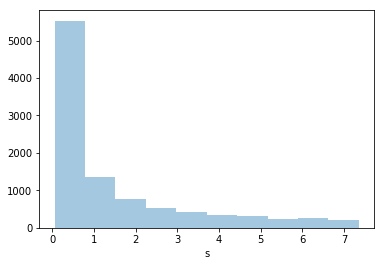

In [0]:
import pandas as pd
import random
import math
import seaborn as sns

random.seed(0)

# Generate some data and plot it
randomdata=[ 20/math.exp(1+5*random.uniform(0,1)) for i in range(10000)]
df=pd.DataFrame(randomdata, columns=["s"])
sns.distplot(df["s"], bins=10, kde=False)

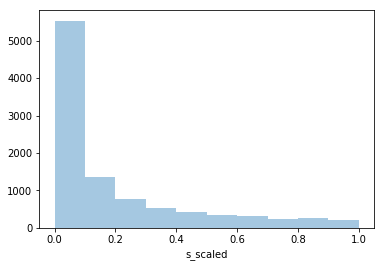

In [0]:
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler().fit(df["s"].values.reshape(-1,1))

df["s_scaled"] = scaler.transform(df["s"].values.reshape(-1,1))
sns.distplot(df["s_scaled"], bins=10, kde=False)

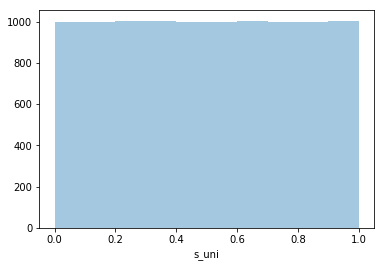

In [0]:
uni_transformer = preprocessing.QuantileTransformer()
uni_transformer.fit(df["s"].values.reshape(-1,1))

df["s_uni"]= uni_transformer.transform(df["s"].values.reshape(-1,1))
sns.distplot(df["s_uni"], bins=10, kde=False)

## One-hot-encoding

For one-hot-encoding we can use the pandas function **get_dummies()**

In [0]:
sizes=["small", "medium", "large"]

size_df = pd.DataFrame([sizes[round(random.uniform(-0.5,2.5))] for i in range(10)], columns=["size"])

size_df

,size
0,large
1,medium
2,medium
3,small
4,medium
5,large
6,small
7,small
8,small
9,small


In [0]:
pd.get_dummies(size_df["size"])

,large,medium,small
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [0]:
pd.concat([size_df, pd.get_dummies(size_df["size"])], axis=1)

,size,large,medium,small
0,large,1,0,0
1,medium,0,1,0
2,medium,0,1,0
3,small,0,0,1
4,medium,0,1,0
5,large,1,0,0
6,small,0,0,1
7,small,0,0,1
8,small,0,0,1
9,small,0,0,1


# Missing values

Missing values can usually be replaced with a few pandas operations

In [0]:
random.seed(2)
sizes=[39, 40, 41, 42, 43, 44, 45, None]

shoe_df = pd.DataFrame([sizes[round(random.uniform(-0.5,7.5))] for i in range(10)], columns=["shoesize"])

In [0]:
shoe_df

,shoesize
0,NaN
1,NaN
2,39.0
3,39.0
4,45.0
5,44.0
6,44.0
7,41.0
8,43.0
9,43.0


In this case the missing values are indicated by **NaN** (not-a-number). We can find these with the function **isna()** and set these values to the mean of the rest of the column.

In [0]:
shoe_df[shoe_df["shoesize"].isna()]=shoe_df["shoesize"].mean()

In [0]:
shoe_df

,shoesize
0,42.25
1,42.25
2,39.00
3,39.00
4,45.00
5,44.00
6,44.00
7,41.00
8,43.00
9,43.00
